In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import klib as kl
import os
import warnings

os.environ['KERAS_BACKEND']='tensorflow'
os.environ["CUDA_VISIBLE_DEVICES"]="0"
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
warnings.filterwarnings('ignore')
plt.rcParams['font.sans-serif'] = ['Kaiti']
plt.rcParams['axes.unicode_minus'] = False
PIC_PATH = "../../models/image/image4"
DATA_PATH = '../../data'
RESULT_PATH = '../../data/summary'
MODEL_PATH = '../../models/model4'

In [2]:
import pathlib2 as pl2

def creat_dir():
    pic_path = pl2.Path(PIC_PATH)
    if not os.path.exists(PIC_PATH):
        pic_path.mkdir(parents=True, exist_ok=True)
    if not os.path.exists(RESULT_PATH):
        os.mkdir(RESULT_PATH)

creat_dir()

In [3]:
figure_count = 0

def create_figure(figure_name):
    global figure_count
    figure_count += 1
    return PIC_PATH + f'/figure{figure_count}_{figure_name}.png'

In [4]:
data = pd.read_excel(RESULT_PATH + '/evolve_data.xlsx', index_col=0)
data

,RID,COLPROT,ORIGPROT,PTID,SITE,VISCODE,EXAMDATE,DX_bl,AGE,PTGENDER,...,Hippocampus_bl,WholeBrain_bl,Entorhinal_bl,Fusiform_bl,MidTemp_bl,ICV_bl,MOCA_bl,EcogPtTotal_bl,EcogSPTotal_bl,Month_bl
0,2,1,1,011_S_0002,11,0,2005-09-08,CN,74.3,0,...,0.0,0,0,0,0,0,-23,-1.78947,-1.39474,0.00000
1,3,1,1,011_S_0003,11,0,2005-09-12,AD,81.3,0,...,0.0,0,0,0,0,0,-19,-2.69231,-3.09677,0.00000
2,3,1,1,011_S_0003,11,6,2006-03-13,AD,81.3,0,...,127.0,-29770,636,-1106,-1450,-14260,-19,-2.69231,-3.09677,0.03279
3,3,1,1,011_S_0003,11,12,2006-09-12,AD,81.3,0,...,-162.0,-34190,-195,-889,-1092,-16870,-19,-2.69231,-3.09677,0.03280
4,3,1,1,011_S_0003,11,24,2007-09-12,AD,81.3,0,...,-180.0,-41270,-616,-1473,-2024,-17270,-19,-2.69231,-3.09677,0.06560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16217,6080,4,4,941_S_6080,941,60,2022-11-04,SMC,76.8,1,...,-437.9,-84410,-3845,619,390,-1264050,-24,-1.50000,-1.10526,-0.49180
16218,6473,4,4,135_S_6473,135,48,2022-11-01,CN,66.1,1,...,1062.4,-53586,-3915,596,-760,-1290220,-2,0.28948,-0.21052,-0.42620
16219,6498,4,4,305_S_6498,305,48,2022-11-07,EMCI,79.4,0,...,-196.4,-58780,-5940,-1054,612,-1720260,-26,-1.43243,-1.26316,-1.31150
16220,4119,4,2,003_S_4119,3,132,2022-11-10,CN,79.3,0,...,-640.4,-75320,-4204,-1470,1026,-1546640,-27,-1.28205,-1.17949,-2.49200


In [5]:
features = ['RID', 'CDRSB_bl', 'AGE',
 'ADAS11_bl',
 'ADAS13_bl',
 'ADASQ4_bl',
 'MMSE_bl',
 'RAVLT_immediate_bl',
 'RAVLT_learning_bl',
 'RAVLT_forgetting_bl',
 'RAVLT_perc_forgetting_bl',
 'TRABSCOR_bl',
 'FAQ_bl',
'mPACCdigit_bl',
 'mPACCtrailsB_bl',
 'IMAGEUID_bl',
 'Ventricles_bl',
 'Hippocampus_bl',
 'WholeBrain_bl',
 'Entorhinal_bl',
 'Fusiform_bl',
 'MidTemp_bl',
 'ICV_bl',
 'MOCA_bl',
'EcogPtTotal_bl',
 'EcogSPTotal_bl',
 'Month_bl', 'DX_bl', 'DX', 'EXAMDATE_bl', 'EXAMDATE']
data_new = data[features]
data_new

,RID,CDRSB_bl,AGE,ADAS11_bl,ADAS13_bl,ADASQ4_bl,MMSE_bl,RAVLT_immediate_bl,RAVLT_learning_bl,RAVLT_forgetting_bl,...,MidTemp_bl,ICV_bl,MOCA_bl,EcogPtTotal_bl,EcogSPTotal_bl,Month_bl,DX_bl,DX,EXAMDATE_bl,EXAMDATE
0,2,0.0,74.3,0.00,0.00,0,0,0,0,48.5455,...,0,0,-23,-1.78947,-1.39474,0.00000,CN,CN,2005-09-08,2005-09-08
1,3,0.0,81.3,0.00,0.00,0,0,0,0,96.0000,...,0,0,-19,-2.69231,-3.09677,0.00000,AD,Dementia,2005-09-12,2005-09-12
2,3,1.5,81.3,-3.00,-1.00,2,4,-3,1,96.0000,...,-1450,-14260,-19,-2.69231,-3.09677,0.03279,AD,Dementia,2005-09-12,2006-03-13
3,3,-1.0,81.3,2.00,4.00,2,-3,9,1,96.0000,...,-1092,-16870,-19,-2.69231,-3.09677,0.03280,AD,Dementia,2005-09-12,2006-09-12
4,3,3.5,81.3,3.67,6.67,2,-1,1,0,96.0000,...,-2024,-17270,-19,-2.69231,-3.09677,0.06560,AD,Dementia,2005-09-12,2007-09-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16217,6080,0.0,76.8,-10.33,-1.33,-5,-29,-27,-3,94.0000,...,390,-1264050,-24,-1.50000,-1.10526,-0.49180,SMC,CN,2017-10-16,2022-11-04
16218,6473,0.0,66.1,-6.66,-6.66,0,2,3,0,55.2857,...,-760,-1290220,-2,0.28948,-0.21052,-0.42620,CN,CN,2018-10-16,2022-11-01
16219,6498,-0.5,79.4,-8.00,6.33,-2,-28,-38,-7,16.1818,...,612,-1720260,-26,-1.43243,-1.26316,-1.31150,EMCI,MCI,2018-09-25,2022-11-07
16220,4119,0.0,79.3,-10.00,-5.00,-2,-30,-33,-3,69.0000,...,1026,-1546640,-27,-1.28205,-1.17949,-2.49200,CN,CN,2011-08-18,2022-11-10


In [6]:
data_new['timestamp'] = data_new['EXAMDATE'] - data_new['EXAMDATE_bl']
data_new['timestamp'] = data_new['timestamp'].astype(np.str)
data_new['timestamp'] = [int(i[0]) for i in data_new['timestamp'].str.split(' ')]
data_new.drop('EXAMDATE', axis=1, inplace=True)
data_new

,RID,CDRSB_bl,AGE,ADAS11_bl,ADAS13_bl,ADASQ4_bl,MMSE_bl,RAVLT_immediate_bl,RAVLT_learning_bl,RAVLT_forgetting_bl,...,MidTemp_bl,ICV_bl,MOCA_bl,EcogPtTotal_bl,EcogSPTotal_bl,Month_bl,DX_bl,DX,EXAMDATE_bl,timestamp
0,2,0.0,74.3,0.00,0.00,0,0,0,0,48.5455,...,0,0,-23,-1.78947,-1.39474,0.00000,CN,CN,2005-09-08,0
1,3,0.0,81.3,0.00,0.00,0,0,0,0,96.0000,...,0,0,-19,-2.69231,-3.09677,0.00000,AD,Dementia,2005-09-12,0
2,3,1.5,81.3,-3.00,-1.00,2,4,-3,1,96.0000,...,-1450,-14260,-19,-2.69231,-3.09677,0.03279,AD,Dementia,2005-09-12,182
3,3,-1.0,81.3,2.00,4.00,2,-3,9,1,96.0000,...,-1092,-16870,-19,-2.69231,-3.09677,0.03280,AD,Dementia,2005-09-12,365
4,3,3.5,81.3,3.67,6.67,2,-1,1,0,96.0000,...,-2024,-17270,-19,-2.69231,-3.09677,0.06560,AD,Dementia,2005-09-12,730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16217,6080,0.0,76.8,-10.33,-1.33,-5,-29,-27,-3,94.0000,...,390,-1264050,-24,-1.50000,-1.10526,-0.49180,SMC,CN,2017-10-16,1845
16218,6473,0.0,66.1,-6.66,-6.66,0,2,3,0,55.2857,...,-760,-1290220,-2,0.28948,-0.21052,-0.42620,CN,CN,2018-10-16,1477
16219,6498,-0.5,79.4,-8.00,6.33,-2,-28,-38,-7,16.1818,...,612,-1720260,-26,-1.43243,-1.26316,-1.31150,EMCI,MCI,2018-09-25,1504
16220,4119,0.0,79.3,-10.00,-5.00,-2,-30,-33,-3,69.0000,...,1026,-1546640,-27,-1.28205,-1.17949,-2.49200,CN,CN,2011-08-18,4102


In [7]:
data_new = data_new[data_new['DX'] != data_new['DX_bl']]
data_new = data_new.sort_values(by='RID', ascending=False)
data_new

,RID,CDRSB_bl,AGE,ADAS11_bl,ADAS13_bl,ADASQ4_bl,MMSE_bl,RAVLT_immediate_bl,RAVLT_learning_bl,RAVLT_forgetting_bl,...,MidTemp_bl,ICV_bl,MOCA_bl,EcogPtTotal_bl,EcogSPTotal_bl,Month_bl,DX_bl,DX,EXAMDATE_bl,timestamp
16203,7105,0.0,77.5,0.00,0.00,0,0,0,0,94.0000,...,-93,-1347900,0,0.00000,0.00000,0.00000,LMCI,MCI,2022-10-20,0
16135,7100,0.0,72.9,0.00,0.00,0,0,0,0,18.4286,...,-1007,-1281410,0,0.00000,0.00000,0.00000,SMC,CN,2022-09-14,0
16013,7092,0.0,68.5,0.00,0.00,0,0,0,0,63.0000,...,14,-1724420,0,0.00000,0.00000,0.00000,SMC,CN,2022-07-12,0
16193,7089,0.0,65.7,0.00,0.00,0,0,0,0,36.0000,...,5024,-1401140,0,0.00000,0.00000,0.00000,SMC,CN,2022-08-03,0
16016,7088,0.0,70.0,0.00,0.00,0,0,0,0,66.4286,...,-174,-1560860,-23,0.00000,0.00000,0.00000,LMCI,MCI,2022-07-14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,3,1.5,81.3,-3.00,-1.00,2,4,-3,1,96.0000,...,-1450,-14260,-19,-2.69231,-3.09677,0.03279,AD,Dementia,2005-09-12,182
1,3,0.0,81.3,0.00,0.00,0,0,0,0,96.0000,...,0,0,-19,-2.69231,-3.09677,0.00000,AD,Dementia,2005-09-12,0
11170,2,1.0,74.3,-1.67,-4.67,-2,-4,-7,1,48.5455,...,-949,-1984660,0,-0.45614,-0.12447,-0.42620,CN,MCI,2005-09-08,2575
11233,2,1.0,74.3,1.33,1.33,0,-4,-7,-1,48.5455,...,-949,-1984660,-6,0.44130,0.71240,-0.36100,CN,MCI,2005-09-08,4037


In [8]:
data_new['target'] = data_new['DX_bl'] + '_' + data_new['DX']
data_new['target'].unique()

array(['LMCI_MCI', 'SMC_CN', 'EMCI_MCI', 'AD_Dementia', 'SMC_MCI',
       'AD_MCI', 'EMCI_CN', 'LMCI_Dementia', 'EMCI_Dementia', 'LMCI_CN',
       'CN_MCI', 'SMC_Dementia', 'CN_Dementia'], dtype=object)

In [9]:
data_new.drop(['DX', 'DX_bl'], axis=1, inplace=True)
group = data_new.groupby('target')
target = data_new['target'].unique()

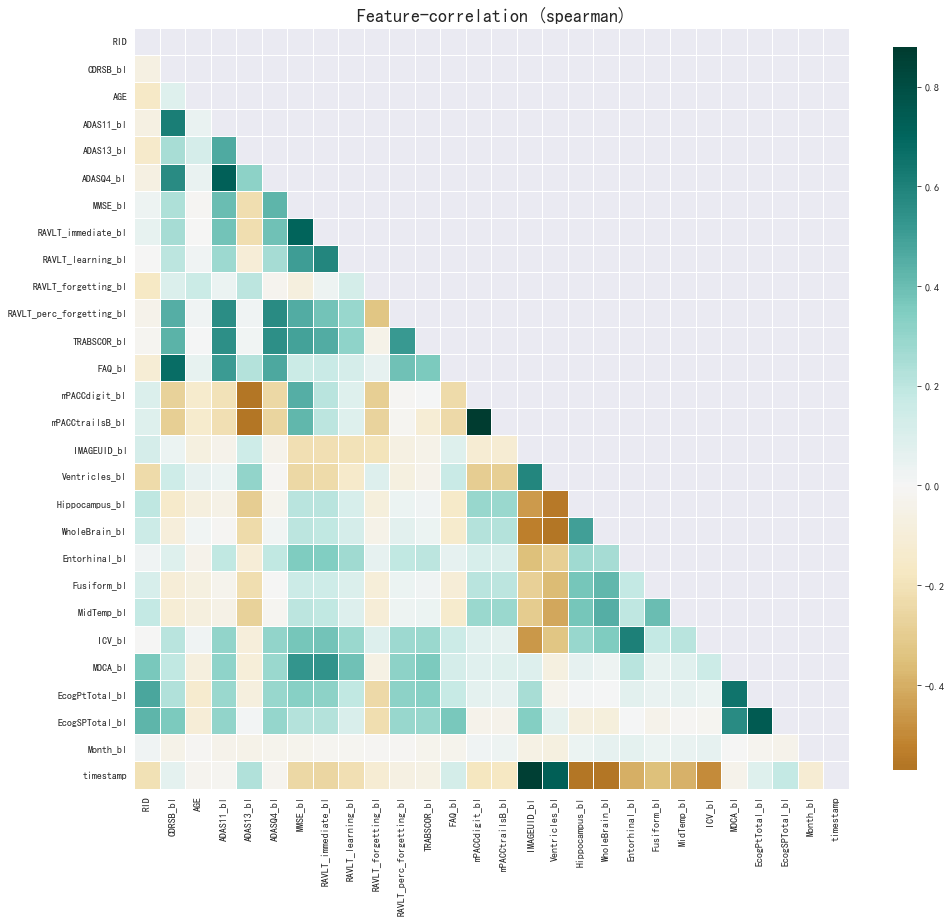

In [10]:
kl.corr_plot(data_new, annot=False, method='spearman', figsize=(16, 14))
plt.savefig(create_figure('spearman'), dpi=800)

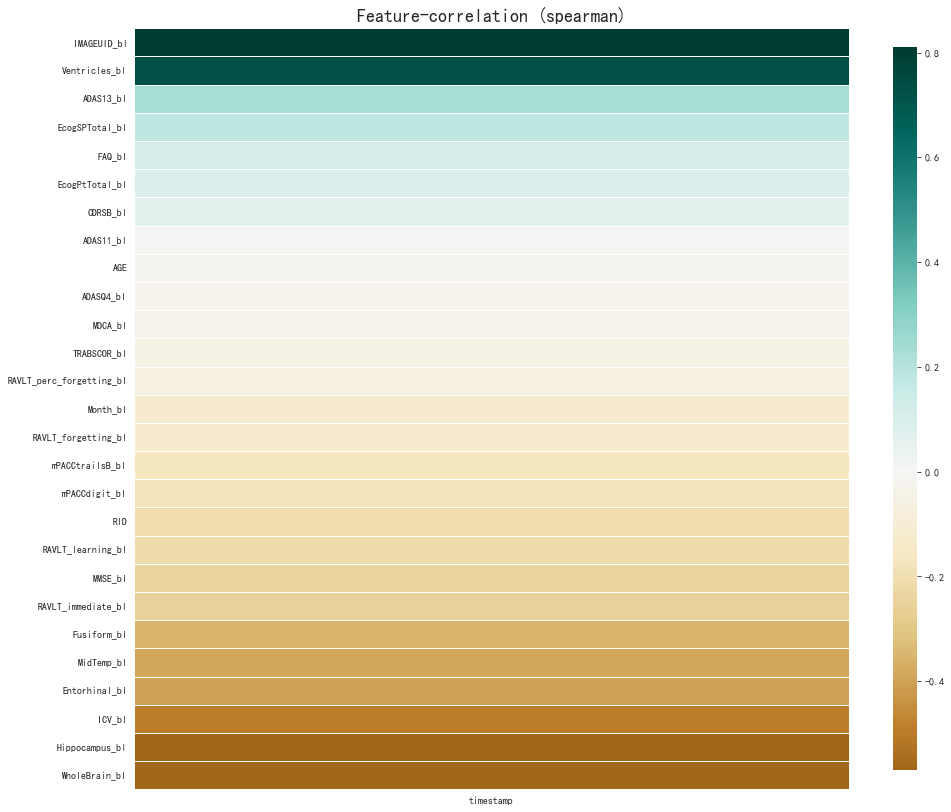

In [11]:
kl.corr_plot(data_new, annot=False, method='spearman', figsize=(16, 14), target='timestamp')
plt.savefig(create_figure('spearman_time_diff'), dpi=800)

In [12]:
import toad

detect = pd.DataFrame()

for i in target:
    group_i = group.get_group(i)
    _detect = toad.detect(group_i)
    _detect['group'] = i
    detect = pd.concat([detect, _detect], axis=0)

detect.to_excel(RESULT_PATH + '/solve4_group.xlsx')

In [13]:
be_bad = ['LMCI_Dementia', 'EMCI_Dementia', 'CN_MCI', 'SMC_Dementia', 'CN_Dementia']
be_better = ['SMC_CN', 'AD_MCI', 'EMCI_CN', 'LMCI_CN']

In [14]:
from statsmodels.stats.anova import anova_lm
from statsmodels.sandbox.stats.multicomp import MultiComparison
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import MultiComparison

def oneWayAnova(df,cata_name,num_name,alpha_anova=0.05,alpha_tukey=0.05):
    info = ''
    df[cata_name]=df[cata_name].astype('str')

    s1=df[cata_name]
    s2=df[num_name]

    fml=num_name+'~C('+cata_name+')'

    model = ols(fml,data=df).fit()
    anova_table_1 = anova_lm(model, typ = 2).reset_index()
    p1=anova_table_1.loc[0,'PR(>F)']

    if p1>alpha_anova:
        print(num_name + '组间【无】显著差异')
        info = info + '\n' + str(num_name) + '组间【无】显著差异\n'
    else:
        print(num_name + '组间【有】显著差异')
        info = info + '\n' + str(num_name) + '组间【有】显著差异\n'

    df_p1=df.groupby([cata_name])[num_name].describe()

    mc = MultiComparison(df[num_name],df[cata_name])
    df_smry = mc.tukeyhsd(alpha=alpha_tukey).summary()
    m = np.array(df_smry.data)
    df_p2 =pd.DataFrame(m[1:],columns=m[0])

    df_p1_sub=df_p1[['mean']].copy()
    df_p1_sub.sort_values(by='mean',inplace=True)

    output_list=[]

    for x in range(1,len(df_p1_sub.index)):
        if (df_p2.loc[((df_p2.group1==df_p1_sub.index[x-1])&(df_p2.group2==df_p1_sub.index[x]))|
                      ((df_p2.group1==df_p1_sub.index[x])&(df_p2.group2==df_p1_sub.index[x-1])),
                      'reject'].iloc[0])=="True":
            smb='<'
        else:
            smb='<='
        if x==1:
            output_list.append(df_p1_sub.index[x-1])
            output_list.append(smb)
            output_list.append(df_p1_sub.index[x])
        else:
            output_list.append(smb)
            output_list.append(df_p1_sub.index[x])
    out_sentence=' '.join(output_list)
    print(out_sentence)
    info += out_sentence
    info += '\n\n'

    return df_p1,df_p2, info

In [15]:
better = pd.DataFrame()

for i in be_better:
    better = pd.concat([better, group.get_group(i)], axis=0)

better

,RID,CDRSB_bl,AGE,ADAS11_bl,ADAS13_bl,ADASQ4_bl,MMSE_bl,RAVLT_immediate_bl,RAVLT_learning_bl,RAVLT_forgetting_bl,...,Fusiform_bl,MidTemp_bl,ICV_bl,MOCA_bl,EcogPtTotal_bl,EcogSPTotal_bl,Month_bl,EXAMDATE_bl,timestamp,target
16135,7100,0.0,72.9,0.00,0.00,0,0,0,0,18.42860,...,48,-1007,-1281410,0,0.00000,0.00000,0.00000,2022-09-14,0,SMC_CN
16013,7092,0.0,68.5,0.00,0.00,0,0,0,0,63.00000,...,-6249,14,-1724420,0,0.00000,0.00000,0.00000,2022-07-12,0,SMC_CN
16193,7089,0.0,65.7,0.00,0.00,0,0,0,0,36.00000,...,-138,5024,-1401140,0,0.00000,0.00000,0.00000,2022-08-03,0,SMC_CN
16097,7082,0.0,60.9,0.00,0.00,0,0,0,0,11.33330,...,659,-629,-1473160,0,0.00000,0.00000,0.00000,2022-07-27,0,SMC_CN
16012,7080,0.0,57.2,0.00,0.00,0,0,0,0,38.00000,...,46,214,-1445900,0,0.00000,0.00000,0.00000,2022-07-12,0,SMC_CN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11046,112,-1.5,70.6,-2.00,-1.00,0,-1,-9,-1,6.14286,...,-760,-1191,-1704260,5,0.05336,0.39085,0.62290,2006-02-01,2177,LMCI_CN
294,112,-1.0,70.6,-2.67,-3.67,-1,-1,-50,-9,6.14286,...,-540,-1172,11740,-24,-1.48718,-1.23077,0.36070,2006-02-01,1087,LMCI_CN
293,112,-1.0,70.6,-3.33,-5.33,-2,-1,13,-1,6.14286,...,-742,-377,14560,-24,-1.48718,-1.23077,0.16390,2006-02-01,727,LMCI_CN
290,112,-1.0,70.6,-2.00,-1.00,1,-1,-7,-7,6.14286,...,-191,-1599,11020,-24,-1.48718,-1.23077,0.22951,2006-02-01,176,LMCI_CN


In [16]:
better_excel = pd.DataFrame()

info = ''
columns = better.drop(['target', 'EXAMDATE_bl', 'RID'], axis=1).columns
for col in columns:
    d1, d2, infos = oneWayAnova(better, cata_name='target', num_name=col)
    d2['target'] = col
    better_excel = pd.concat([better_excel, d2], axis=0)
    print(d2)
    info = info + str(d2) + infos
better_excel.to_excel(RESULT_PATH + '/solve_5_better_ANOVA.xlsx')
with open(RESULT_PATH + '/solve5_info_better.txt', 'w') as f:
    f.write(info)

CDRSB_bl组间【有】显著差异
LMCI_CN < EMCI_CN <= AD_MCI < SMC_CN
    group1   group2 meandiff   p-adj    lower    upper reject    target
0   AD_MCI  EMCI_CN  -0.3161  0.0804  -0.6569   0.0248  False  CDRSB_bl
1   AD_MCI  LMCI_CN  -0.5901  0.0001  -0.9317  -0.2485   True  CDRSB_bl
2   AD_MCI   SMC_CN   0.4804  0.0011   0.1501   0.8107   True  CDRSB_bl
3  EMCI_CN  LMCI_CN   -0.274     0.0  -0.4077  -0.1403   True  CDRSB_bl
4  EMCI_CN   SMC_CN   0.7965     0.0   0.6951   0.8979   True  CDRSB_bl
5  LMCI_CN   SMC_CN   1.0705     0.0   0.9666   1.1744   True  CDRSB_bl
AGE组间【有】显著差异
EMCI_CN < SMC_CN <= LMCI_CN < AD_MCI
    group1   group2 meandiff   p-adj     lower    upper reject target
0   AD_MCI  EMCI_CN  -9.4432     0.0  -14.1613   -4.725   True    AGE
1   AD_MCI  LMCI_CN  -5.1492  0.0265   -9.8778  -0.4206   True    AGE
2   AD_MCI   SMC_CN  -5.3913  0.0132   -9.9635  -0.8191   True    AGE
3  EMCI_CN  LMCI_CN    4.294     0.0    2.4434   6.1446   True    AGE
4  EMCI_CN   SMC_CN   4.0519     0.0    2

In [17]:
bader = pd.DataFrame()

for i in be_bad:
    bader = pd.concat([bader, group.get_group(i)], axis=0)

bader

,RID,CDRSB_bl,AGE,ADAS11_bl,ADAS13_bl,ADASQ4_bl,MMSE_bl,RAVLT_immediate_bl,RAVLT_learning_bl,RAVLT_forgetting_bl,...,Fusiform_bl,MidTemp_bl,ICV_bl,MOCA_bl,EcogPtTotal_bl,EcogSPTotal_bl,Month_bl,EXAMDATE_bl,timestamp,target
15903,6911,8.0,73.4,26.67,26.67,-1,-10,-7,0,49.0000,...,-968,449,-1865640,-7,0.94737,2.22408,-1.6721,2021-03-11,417,LMCI_Dementia
15527,6800,9.0,87.5,18.33,19.33,0,-10,-20,1,94.0000,...,-46,0,31570,-6,0.40741,0.50000,0.0984,2019-09-09,546,LMCI_Dementia
15705,6788,1.5,69.7,5.67,9.67,3,-6,5,-1,94.0000,...,-2325,-935,18360,-6,-0.50000,0.28947,2.6885,2019-08-19,833,LMCI_Dementia
15971,6724,9.5,75.4,13.66,16.66,1,-7,-6,-1,95.0000,...,-2355,-1295,-1571230,-6,1.65790,0.89474,-0.0656,2019-06-11,1100,LMCI_Dementia
15469,6724,2.5,75.4,-1.00,-2.00,0,2,5,1,95.0000,...,-546,-952,750,-1,0.15790,0.23684,0.0656,2019-06-11,364,LMCI_Dementia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11054,106,4.0,73.2,14.00,22.00,6,-5,-34,-8,29.3333,...,-380,-3173,-1784790,-1,0.92510,1.89676,-0.6560,2006-02-01,3680,CN_Dementia
11055,106,3.0,73.2,10.00,18.00,6,-6,-31,-9,29.3333,...,-380,-3173,-1784790,-5,0.48718,0.90916,0.1310,2006-02-01,3290,CN_Dementia
11089,61,3.5,77.0,22.00,30.00,8,-5,-8,-5,23.0000,...,-412,-1195,-1470710,-12,-0.01214,1.46942,-1.8690,2005-12-15,3717,CN_Dementia
11090,61,1.5,77.0,22.00,31.00,8,-5,-11,0,23.0000,...,-412,-1195,-1470710,-7,-0.26315,1.04837,-1.6390,2005-12-15,3344,CN_Dementia


In [18]:
info = ''
bader_excel = pd.DataFrame()

columns = better.drop(['target', 'EXAMDATE_bl', 'RID'], axis=1).columns
for col in columns:
    d1, d2, infos = oneWayAnova(bader, cata_name='target', num_name=col)
    d2['target'] = col
    bader_excel = pd.concat([bader_excel, d2], axis=0)
    print(d2)
    info = info + str(d2) + infos
better_excel.to_excel(RESULT_PATH + '/solve_5_bader_ANOVA.xlsx')
with open(RESULT_PATH + '/solve5_info_bader.txt', 'w') as f:
    f.write(info)

CDRSB_bl组间【有】显著差异
CN_MCI < EMCI_Dementia <= LMCI_Dementia <= SMC_Dementia <= CN_Dementia
          group1         group2 meandiff   p-adj    lower    upper reject  \
0    CN_Dementia         CN_MCI  -5.2252     0.0  -6.2578  -4.1926   True   
1    CN_Dementia  EMCI_Dementia  -2.9336     0.0   -4.113  -1.7542   True   
2    CN_Dementia  LMCI_Dementia  -2.4342     0.0  -3.3737  -1.4946   True   
3    CN_Dementia   SMC_Dementia  -1.4167  0.8022  -4.9078   2.0745  False   
4         CN_MCI  EMCI_Dementia   2.2916     0.0   1.3794   3.2038   True   
5         CN_MCI  LMCI_Dementia   2.7911     0.0   2.2219   3.3602   True   
6         CN_MCI   SMC_Dementia   3.8086  0.0197   0.3983   7.2188   True   
7  EMCI_Dementia  LMCI_Dementia   0.4995  0.4381  -0.3059   1.3048  False   
8  EMCI_Dementia   SMC_Dementia   1.5169  0.7524  -1.9405   4.9744  False   
9  LMCI_Dementia   SMC_Dementia   1.0175  0.9241  -2.3657   4.4007  False   

     target  
0  CDRSB_bl  
1  CDRSB_bl  
2  CDRSB_bl  
3  CDRS

In [19]:
better['target'] = 'better'
bader['target'] = 'bader'

all_ = pd.concat([better, bader], axis=0)
info = ''
result_excel = pd.DataFrame()

for col in columns:
    d1, d2, infos = oneWayAnova(all_, cata_name='target', num_name=col)
    d2['target'] = col
    result_excel = pd.concat([result_excel, d2], axis=0)
    print(d2)
    info = info + str(d2) + infos
result_excel.to_excel(RESULT_PATH + '/solve_5_result_ANOVA.xlsx')
with open(RESULT_PATH + '/solve5_info_result.txt', 'w') as f:
    f.write(info)

CDRSB_bl组间【有】显著差异
better < bader
  group1  group2 meandiff p-adj    lower    upper reject    target
0  bader  better  -3.7597   0.0  -3.9484  -3.5711   True  CDRSB_bl
AGE组间【有】显著差异
better < bader
  group1  group2 meandiff p-adj   lower    upper reject target
0  bader  better  -3.6017   0.0  -4.101  -3.1024   True    AGE
ADAS11_bl组间【有】显著差异
better < bader
  group1  group2 meandiff p-adj    lower  upper reject     target
0  bader  better  -7.4709   0.0  -8.0317  -6.91   True  ADAS11_bl
ADAS13_bl组间【有】显著差异
better < bader
  group1  group2  meandiff p-adj     lower     upper reject     target
0  bader  better  -10.9304   0.0  -11.5844  -10.2763   True  ADAS13_bl
ADASQ4_bl组间【有】显著差异
better < bader
  group1  group2 meandiff p-adj    lower    upper reject     target
0  bader  better  -1.8671   0.0  -2.0268  -1.7075   True  ADASQ4_bl
MMSE_bl组间【有】显著差异
bader < better
  group1  group2 meandiff p-adj   lower   upper reject   target
0  bader  better   4.6434   0.0  4.3126  4.9743   True  MMSE_bl
RAVLT_i

In [20]:
g_detect = toad.detect(better)
b_detect = toad.detect(bader)

g_detect['target'] = 'better'
b_detect['target'] = 'worsen'

res_detect = pd.concat([g_detect, b_detect], axis=0)
res_detect

,type,size,missing,unique,mean_or_top1,std_or_top2,min_or_top3,1%_or_top4,10%_or_top5,50%_or_bottom5,75%_or_bottom4,90%_or_bottom3,99%_or_bottom2,max_or_bottom1,target
RID,int64,1198,0.00%,443,4980.582638,1756.476116,112.0,166.85,2108.0,5227.5,6248.25,6519.0,7035.24,7100.0,better
CDRSB_bl,float64,1198,0.00%,14,-0.190735,0.618341,-3.5,-2.515,-1.0,0.0,0.0,0.0,1.0,3.0,better
AGE,float64,1198,0.00%,216,70.48414,6.533016,50.4,57.0,63.0,69.3,75.1,79.5,86.4,90.3,better
ADAS11_bl,float64,1198,0.00%,77,-0.24515,2.548155,-13.0,-8.3402,-3.33,0.0,0.67,2.67,6.0,12.0,better
ADAS13_bl,float64,1198,0.00%,126,-0.330851,3.226675,-14.0,-9.6799,-4.0,0.0,1.0,3.33,8.0,18.0,better
ADASQ4_bl,int64,1198,0.00%,11,-0.201169,1.396534,-5.0,-4.0,-2.0,0.0,0.0,1.0,3.0,5.0,better
MMSE_bl,int64,1198,0.00%,17,-0.146077,2.657477,-30.0,-5.0,-1.0,0.0,1.0,1.0,3.0,5.0,better
RAVLT_immediate_bl,int64,1198,0.00%,54,0.099332,8.035176,-57.0,-25.06,-8.0,0.0,4.0,9.0,17.0,32.0,better
RAVLT_learning_bl,int64,1198,0.00%,19,-0.210351,2.454088,-9.0,-7.0,-3.0,0.0,1.0,3.0,6.0,10.0,better
RAVLT_forgetting_bl,float64,1198,0.00%,93,32.592873,24.775264,0.0,0.0,2.0,27.66665,48.5455,69.0,92.0,97.0,better


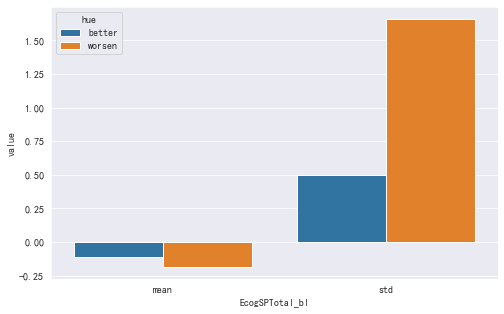

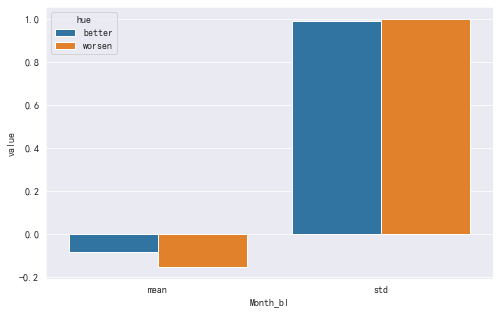

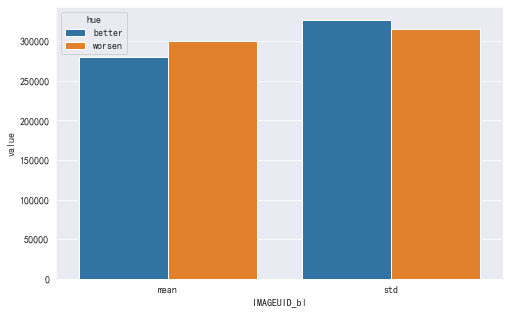

In [21]:
columns_none = ['EcogSPTotal_bl', 'Month_bl', 'IMAGEUID_bl']

for col in columns_none:
    plt.figure(figsize=(8, 5))
    df = pd.DataFrame(
        {
            col: ['mean', 'mean', 'std', 'std'],
            'value': res_detect.loc[col, 'mean_or_top1'].tolist() +
                     res_detect.loc[col, 'std_or_top2'].tolist(),
            'hue': ['better', 'worsen', 'better', 'worsen']
        }
    )
    sns.barplot(x=col, y='value', hue='hue', data=df)
    plt.savefig(create_figure(f'{col}_description'), dpi=800)

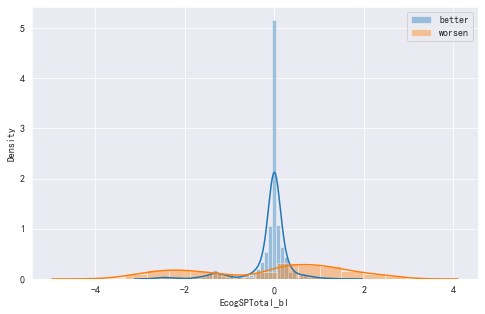

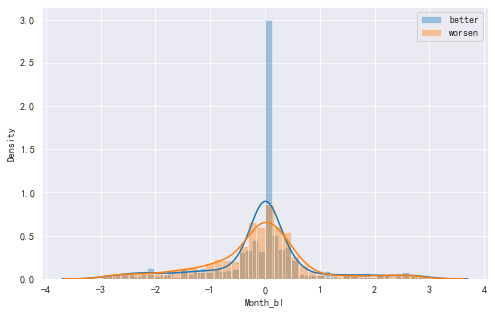

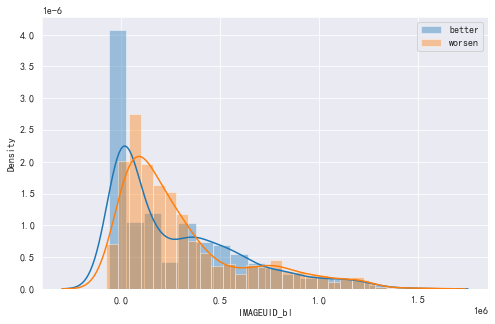

In [22]:
for col in columns_none:
    plt.figure(figsize=(8, 5))
    sns.distplot(better[col], label='better')
    sns.distplot(bader[col], label='worsen')
    plt.legend()
    plt.savefig(create_figure(f'{col}_distplot'), dpi=800)

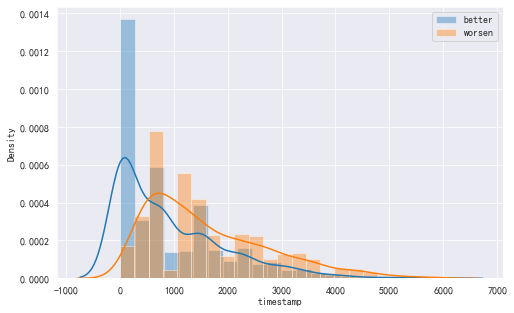

In [23]:
plt.figure(figsize=(8, 5))
sns.distplot(better['timestamp'], label='better')
sns.distplot(bader['timestamp'], label='worsen')
plt.legend()
plt.savefig(create_figure('timestamp_distplot'), dpi=800)

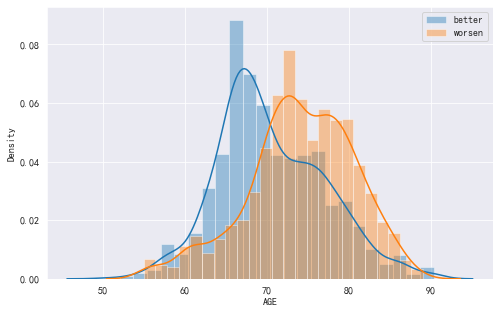

In [24]:
plt.figure(figsize=(8, 5))
sns.distplot(better['AGE'], label='better')
sns.distplot(bader['AGE'], label='worsen')
plt.legend()
plt.savefig(create_figure('AGE_distplot'), dpi=800)